In [2]:
import os
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torch.optim import SGD
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.datasets import MNIST

from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
from torch.autograd import Variable
import matplotlib.pyplot as plt


In [3]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

In [4]:
df = sklearn_to_df(datasets.load_breast_cancer())
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
# for initial check

n = 10000 # 10000 points
X_1d = np.random.uniform(-1,1, n) #randomim X from -1 to 1
noise = np.random.normal(0, 1, n) # generate noise by Gaussian distribution
true_w, true_b = 7.6, -3.3 #We set the parameters that we will try to calculate by regression

#We calculate values at our points with a noise equal to approximately 2%
y_1d = true_w * X_1d + true_b + noise # y = w * x + b + ε 

X_train, X_test, y_train, y_test = train_test_split(X_1d, y_1d, test_size=0.25, random_state=0)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7500, 1) (2500, 1) (7500,) (2500,)


In [6]:
X = df[df.columns[0:30]].to_numpy(dtype='float32')

In [7]:
y = df[df.columns[30:31]].to_numpy(dtype='float32')

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
device= 'cuda'

In [10]:
np.shape(X_train)

(455, 30)

In [11]:
np.shape(y_train)

(455, 1)

In [14]:
# input lib
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy
# create a model
model = Sequential()

# Dimension of the input layer and the first hidden one, also the activation function of the neuron
model.add(Dense(units=8, input_dim=30, kernel_initializer='normal', activation='relu'))
 
# Second hidden layer
# it is not required to define the parameters of the previous one. automatically
model.add(Dense(units=6,  kernel_initializer='normal', activation='relu'))
model.add(Dense(units=6,  kernel_initializer='normal', activation='relu'))
 
# output layer
model.add(Dense(1, kernel_initializer='normal'))
 
loss_fn = BinaryCrossentropy(from_logits=True)

# Preparing the model
model.compile(loss=loss_fn, optimizer='adam', metrics = [BinaryAccuracy()])
 
#Launching training
log = model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
23/23 [==============================] - 1s 5ms/step - loss: 0.6771 - binary_accuracy: 0.3714
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 0.6640 - binary_accuracy: 0.3714
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.6456 - binary_accuracy: 0.3714
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.6179 - binary_accuracy: 0.3714
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5778 - binary_accuracy: 0.3714
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5318 - binary_accuracy: 0.3714
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 0.4987 - binary_accuracy: 0.3714
Epoch 8/50
23/23 [==============================] - 0s 3ms/step - loss: 0.4758 - binary_accuracy: 0.3714
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 0.4571 - binary_accuracy: 0.3714
Epoch 10/50
23/23 [==============================] - 0s

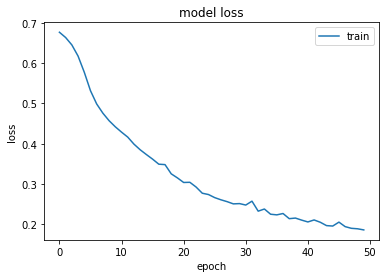

In [16]:
#see how you learn
plt.plot(log.history['loss'])
#plt.plot(log.history['binary_acc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()